# Basic cluster examples
Here we show some simple examples also used in the paper. We distinguish between an "idealized" data set which can be perfectly segmented, and a "realistic" dataset for which no single best answer exists.

In [1]:
suppressMessages(source('./segmentation_helpers.R'))
options(repr.plot.width = 4, repr.plot.height = 4)

## Idealized segmentation
We generate sample data with 3 clusters, nicely separated from one another. K-means does a perfect job clustering these three groups. The dendrogram also shows a clear point to cut the tree: the long lines from height ~1.2 to ~2.5 shows the three subgroups are far apart, such that you'd have to bridge a long distance between the subgroups before joining them together. That indicates the groups should probably be separate.

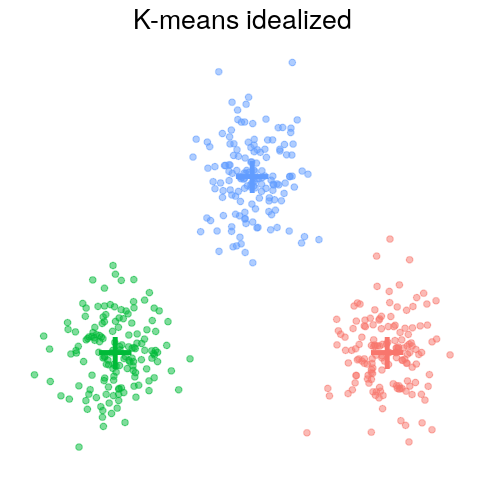

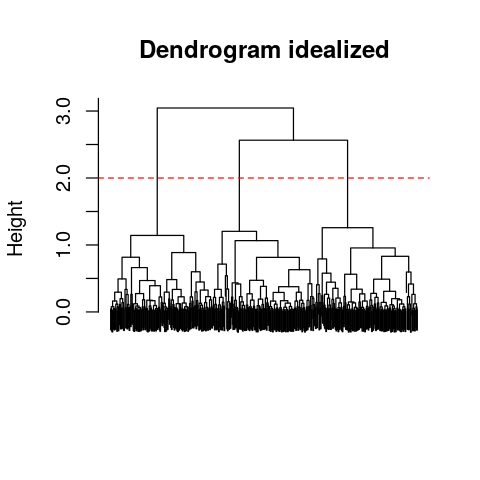

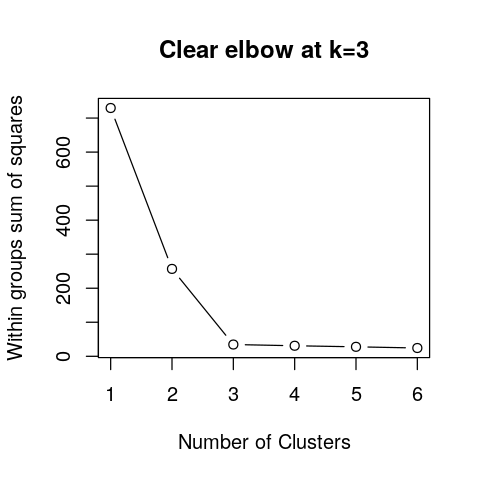

In [2]:
set.seed(42)
df = GenerateClusteredData(
  cluster.centres.x = c(1, 2, 3),
  cluster.centres.y = c(1, 2, 1),
  cluster.n         = c(150, 150, 150),
  cluster.sds.x     = c(0.2, 0.2, 0.2),
  cluster.sds.y     = c(0.2, 0.2, 0.2)
)
GenerateAndPlotClusters(df, plot.label='idealized')
# manually add example cut
abline(h=2, col='red', lty=2)

PlotElbowKmeans(df, max.clusters = 6)
title('Clear elbow at k=3')

## Realistic segmentation
In reality, data tends to be continuous without clear boundaries between subgroups of the population. It is up to the team to figure out what a valuable segmentation looks like in this case, as statistically there is no clear winner. As also quoted in the readme ([source](http://joelcadwell.blogspot.com/2014/03/)):

> If there is variability in our data, a cluster analysis will yield partitions. Given a partitioning, a data analyst will magnify those differences by focusing on contrastive comparisons and assigning evocative names. Once we have names, especially if those names have high imagery, can we be blamed for the reification of minor distinctions?

In the example below, any solution that segments the data does not have gaps between the segments. Especially points on the border could equally well belong to either group. This is also reflected in the dendrogram which does not show a clear place to cut the tree (indicated by multiple red lines - none can be more or less easily justified).

The point, then, is that deciding on the _number_ of groups becomes less of a statistical exercise and more about considering each solutions' merits for intervention and understanding.


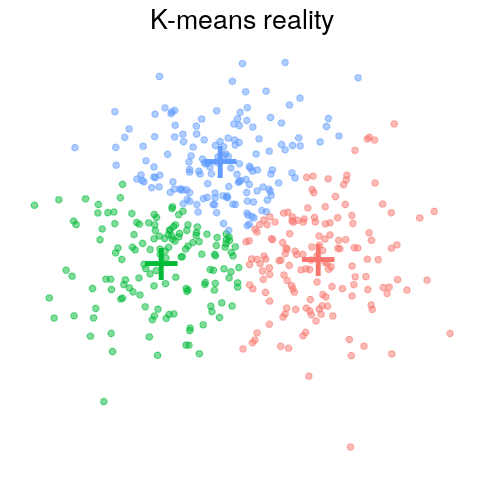

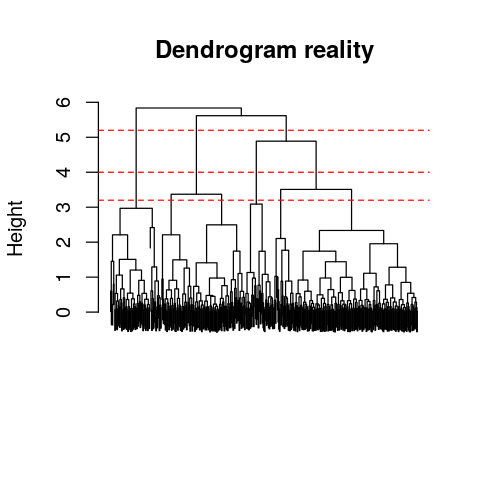

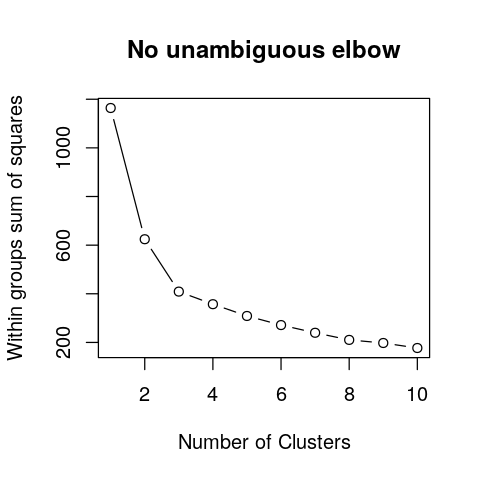

In [3]:
set.seed(43)
df = GenerateClusteredData(
  cluster.centres.x = c(1, 2, 3),
  cluster.centres.y = c(1, 2, 1),
  cluster.n         = c(150, 150, 150),
  cluster.sds.x     = c(0.7, 0.7, 0.7),
  cluster.sds.y     = c(0.7, 0.7, 0.7)
)

GenerateAndPlotClusters(df, plot.label='reality')
# manually add example cut
abline(h=c(5.2, 4, 3.2), col='red', lty=2)

PlotElbowKmeans(df, max.clusters = 10)
title('No unambiguous elbow')

## Choosing the right algorithm for the job
There are many situations in which k-means breaks down (also shown [here](https://stats.stackexchange.com/questions/133656/how-to-understand-the-drawbacks-of-k-means/133694#133694)). In fact, k-means is only rarely appropriate when working with minimally processed data. 

Here is one example where different input variables have different variances so your clusters are not spheres. K-means fails miserably, placing the centroids in no-mans-land and splitting each "true" cluster in half. The solution effectively uses 1 dimension of your data only, segmenting along x. 

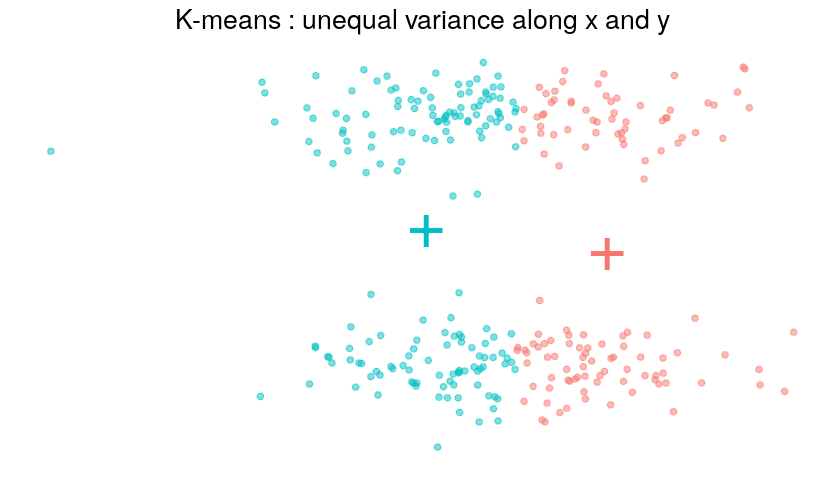

In [4]:
options(repr.plot.width=7)
df = GenerateClusteredData(
  cluster.centres.x = c(1, 1),
  cluster.centres.y = c(1, 2),
  cluster.n         = c(150, 150),
  cluster.sds.x     = c(4, 4),
  cluster.sds.y     = c(0.1, 0.1)
)
GenerateAndPlotClusters(df, plot.label=': unequal variance along x and y', do.dendrogram=FALSE)
options(repr.plot.width=4)

A [Gaussian mixture model](https://brilliant.org/wiki/gaussian-mixture-model/) (GMM) can easily cluster data such as this, as would  e.g. [DBSCAN](https://en.wikipedia.org/wiki/DBSCAN). GMMs explicitly model the variance of the data along each dimension, so are not fooled by such patterns (though will not handle data very well that are not normally distributed - a common issue in questionnaire data for example).

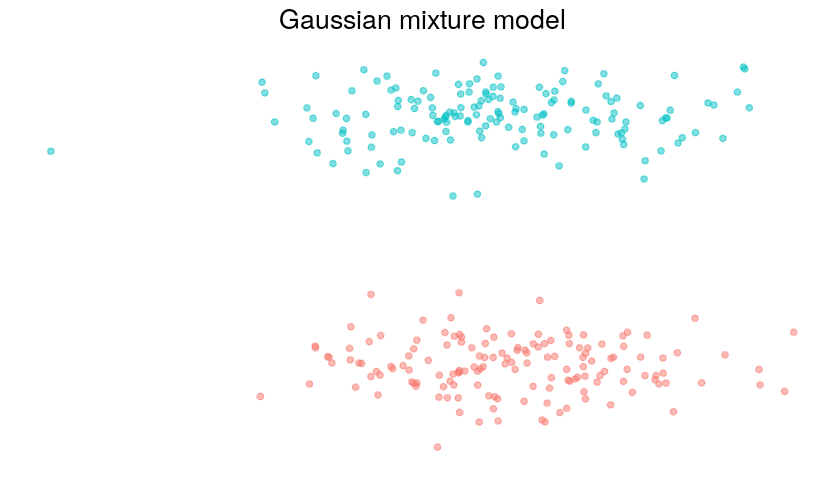

In [5]:
mcl = mclust::Mclust(dplyr::select(df, x, y))
options(repr.plot.width=7)
PrettyScatter(
    ggplot(cbind(dplyr::select(df, x, y), cluster=factor(mcl$classification)), aes(x, y, color=cluster)) + 
      geom_point(alpha=0.5) +
      labs(title='Gaussian mixture model')
    )
options(repr.plot.width=4)